In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn. decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

In [59]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
import seaborn as sns

📌 Introduction :

The Iris dataset is a classic multivariate dataset introduced by Sir Ronald Fisher. It contains 150 records under five attributes: sepal length, sepal width, petal length, petal width, and species (target class). The dataset is often used for classification and clustering tasks in machine learning to distinguish between three iris flower species — Setosa, Versicolor, and Virginica.

In [60]:
from sklearn.datasets import load_iris
iris = load_iris()

In [61]:
load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [62]:
print(iris_df.head())
print(iris_df.tail())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0  

In [74]:
print(iris_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [75]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [76]:
print(iris_df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [77]:
# Data processing


x=iris_df.drop('species',axis=1)
y=iris_df['species']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler =StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)





 logistic Regression result :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy :  1.0

 overfitting check:
Training Score: 96.66666666666667
Testing Score: 100.0
Cross-Validation Mean Accuracy: 0.9583333333333334


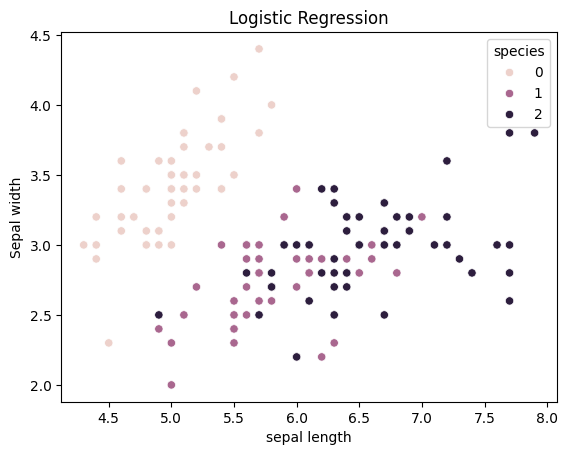

In [78]:
# supervised learning : logistic regression


model=LogisticRegression(max_iter=500)
model.fit(x_train ,y_train)
y_pred=model.predict(x_test)

print("\n logistic Regression result :")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy : ",accuracy_score(y_test,y_pred))

#overfitting check:                        #Overfitting usually means Training score is high, but test score is low

print("\n overfitting check:")
train_score = model.score(x_train, y_train)*100
test_score = model.score(x_test, y_test)*100

print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")



scores = cross_val_score(model, x_train, y_train, cv=5)
print("Cross-Validation Mean Accuracy:", scores.mean())



# FOR VISUALIZATION:

sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=y)
plt.xlabel('sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression')
plt.show()






 Decision tree result :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy :  1.0

 overfitting check:
Training Score: 100.0
Testing Score: 100.0
Cross-Validation Mean Accuracy: 0.95


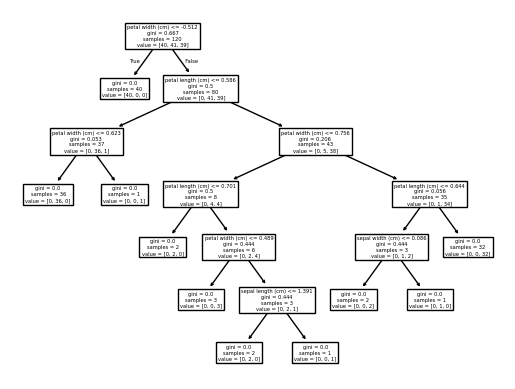

<Figure size 700x800 with 0 Axes>

In [67]:
# supervised learning :Decision tree

dt_model=DecisionTreeClassifier(random_state=50)
dt_model.fit(x_train ,y_train)
y_pred=dt_model.predict(x_test)

print("\n Decision tree result :")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy : ",accuracy_score(y_test,y_pred))

#overfitting check

print("\n overfitting check:")                 #Overfitting usually means Training score is high, but test score is low
train_score = dt_model.score(x_train, y_train)*100
test_score = dt_model.score(x_test, y_test)*100

print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")


scores = cross_val_score(dt_model, x_train, y_train, cv=5)
print("Cross-Validation Mean Accuracy:", scores.mean())


# FOR VISUALIZATION:
from sklearn.tree import plot_tree
plot_tree(dt_model, feature_names=iris.feature_names )
plt.figure(figsize=(7,8))
plt.show()







 random forest result :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy :  1.0
Training Score: 100.0
Testing Score: 100.0
Cross-Validation Mean Accuracy: 0.95


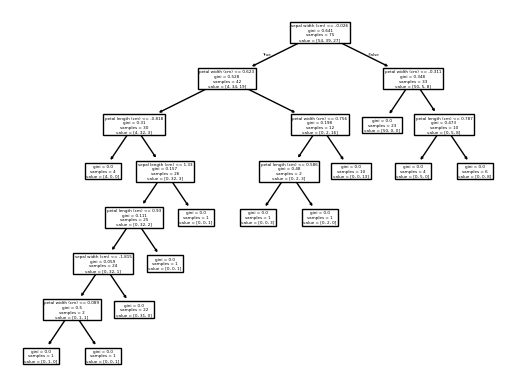

<Figure size 700x800 with 0 Axes>

In [68]:
#  supervised learning:random forest


rf_model=RandomForestClassifier(n_estimators=150,random_state=50)
rf_model.fit(x_train ,y_train)
y_pred=rf_model.predict(x_test)

print("\n random forest result :")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy : ",accuracy_score(y_test,y_pred))

#overfitting check:

train_scores=rf_model.score(x_train,y_train)*100
test_scores=rf_model.score(x_test,y_test)*100
print(f"Training Score: {train_scores}")
print(f"Testing Score: {test_scores}")

scores = cross_val_score(rf_model, x_train, y_train, cv=5)
print("Cross-Validation Mean Accuracy:", scores.mean())

# FOR VISUALIZATION:

from sklearn.tree import plot_tree
plot_tree(rf_model.estimators_[0], feature_names=iris.feature_names )
plt.figure(figsize=(7,8))
plt.show()


 SVM result :
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

accuracy :  0.9666666666666667
Training Score: 98.33333333333333
Testing Score: 96.66666666666667
Cross-Validation Mean Accuracy: 0.95


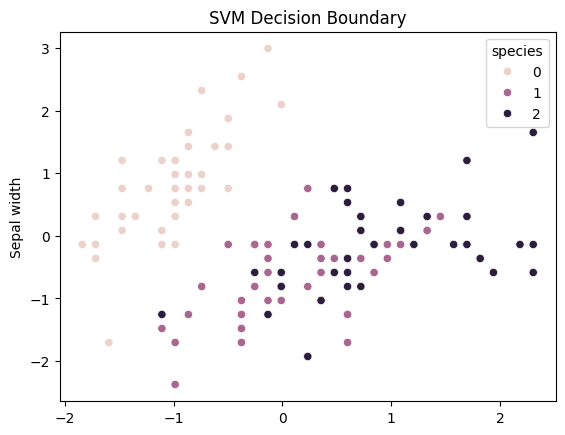

In [69]:
#supervised learning :- SVM

svm_model=SVC(kernel='linear')
svm_model.fit(x_train ,y_train)
y_pred=svm_model.predict(x_test)

print("\n SVM result :")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy : ",accuracy_score(y_test,y_pred))

##overfitting check:

train_scores=svm_model.score(x_train,y_train)*100
test_scores=svm_model.score(x_test,y_test)*100
print(f"Training Score: {train_scores}")
print(f"Testing Score: {test_scores}")

scores = cross_val_score(svm_model, x_train, y_train, cv=5)
print("Cross-Validation Mean Accuracy:", scores.mean())

# FOR VISUALIZATION:

sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train)
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary')
plt.show()


 Linear Regression result :

 Mean Absolute Error:  0.14637694965308537

 Mean Squared Error:  0.037113794407976894

 R2 Score:  0.9468960016420045
Training Score: 92.54199044989622
Testing Score: 94.68960016420044
Cross-Validation Mean Accuracy: 0.911792126690884


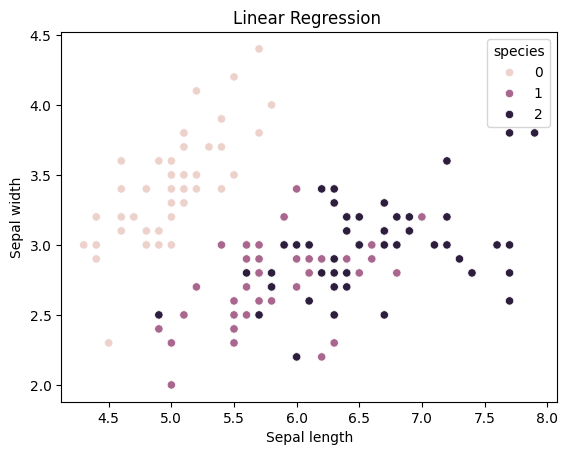

In [70]:
#supervised learning -linear regression


lg_model=LinearRegression()
lg_model.fit(x_train,y_train)
y_pred = lg_model.predict(x_test)

print("\n Linear Regression result :")
print("\n Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("\n Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("\n R2 Score: ",r2_score(y_test,y_pred))

##overfitting check:

train_scores=lg_model.score(x_train,y_train)*100
test_scores=lg_model.score(x_test,y_test)*100
print(f"Training Score: {train_scores}")
print(f"Testing Score: {test_scores}")

scores = cross_val_score(lg_model, x_train, y_train, cv=5)
print("Cross-Validation Mean Accuracy:", scores.mean())

# FOR VISUALIZATION:

sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Linear Regression ')
plt.show()



In [71]:
from sklearn.metrics import adjusted_rand_score   #overfitting check in  unsupervised learning


Adjusted Rand Index (ARI): 0.7163421126838476


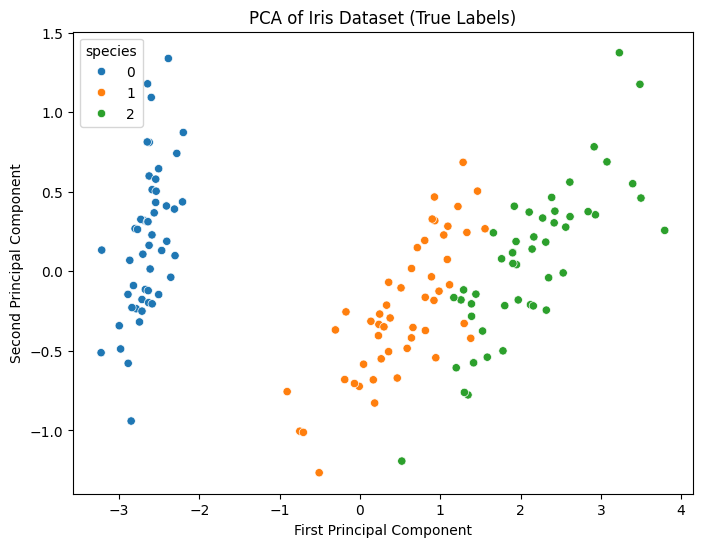

In [72]:
# # unsupervised learning - principal component analysis (PCA)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# KMeans on PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=50)
kmeans.fit(x_pca)

# Calculate Adjusted Rand Index
ari_score = adjusted_rand_score(y, kmeans.labels_)
print("Adjusted Rand Index (ARI):", ari_score)

# Visualize the true labels in PCA space
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y, palette="tab10")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Iris Dataset (True Labels)')
plt.show()


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Cluster Centers:
 [[ 0.66567601 -0.3316042 ]
 [-2.64241546  0.19088505]
 [ 2.34652659  0.27393856]]
Adjusted Rand Index (ARI): 0.7163421126838476


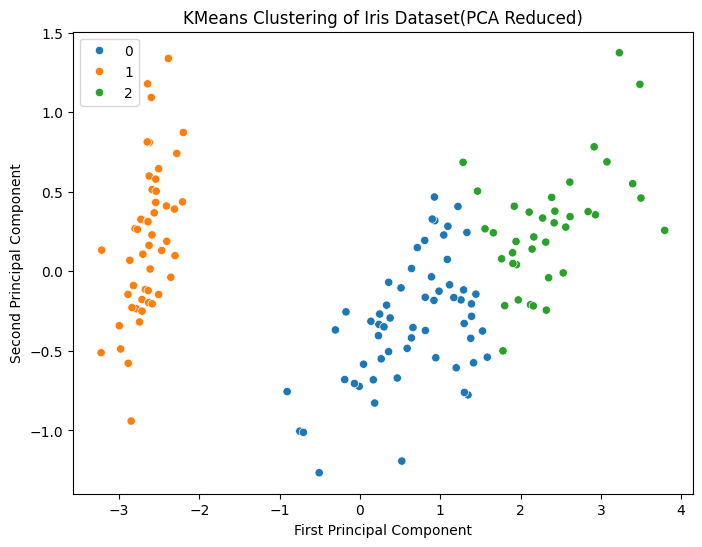

In [73]:
# unsupervised learning - KMean
kmeans=KMeans(n_clusters=3,random_state=50)
kmeans.fit(x_pca)

kmeans=KMeans(n_clusters=3,random_state=50)
kmeans.fit(x_pca)

print(kmeans.labels_)      # Shows which cluster each point belongs to
print("Cluster Centers:\n", kmeans.cluster_centers_) # Shows cluster centers

# ari_score = adjusted_rand_score(y, kmeans.labels_)
print("Adjusted Rand Index (ARI):", ari_score)

# FOR VISUALIZATION:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=kmeans.labels_,palette="tab10")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering of Iris Dataset(PCA Reduced)')
plt.show()




🧠 Conclusion / Summary of Findings
* Petal length and petal width are the most informative features for classifying iris species.

* All classification models performed exceptionally well, achieving 100% accuracy on the test set due to the dataset's clean and well-separated nature.

* Cross-validation scores confirmed the generalization capability of the models with average accuracies above 95%.

* KMeans clustering on PCA-reduced data showed clear separation between species, with a high ARI score, indicating that unsupervised learning was also effective.

